✅ 1. นำเข้าข้อมูล
สมมุติว่าใช้ไฟล์ชื่อ oral_cancer_data.csv โดยมี features และ target column ชื่อว่า label (0 หรือ 1)

In [32]:
import pandas as pd
# โหลดข้อมูล
data = pd.read_csv('oral_cancer_prediction_dataset.csv')
data

,ID,Country,Age,Gender,Tobacco Use,Alcohol Consumption,HPV Infection,Betel Quid Use,Chronic Sun Exposure,Poor Oral Hygiene,Diet (Fruits & Vegetables Intake),Family History of Cancer,Compromised Immune System,Oral Lesions,Unexplained Bleeding,Difficulty Swallowing,White or Red Patches in Mouth,Tumor Size (cm),Cancer Stage,Treatment Type,"Survival Rate (5-Year, %)",Cost of Treatment (USD),Economic Burden (Lost Workdays per Year),Early Diagnosis,Oral Cancer (Diagnosis)
0,1,Italy,36,Female,Yes,Yes,Yes,No,No,Yes,Low,No,No,No,No,No,No,0.000000,0,No Treatment,100.000000,0.00,0,No,No
1,2,Japan,64,Male,Yes,Yes,Yes,No,Yes,Yes,High,No,No,No,Yes,No,No,1.782186,1,No Treatment,83.340103,77772.50,177,No,Yes
2,3,UK,37,Female,No,Yes,No,No,Yes,Yes,Moderate,No,No,No,No,No,Yes,3.523895,2,Surgery,63.222871,101164.50,130,Yes,Yes
3,4,Sri Lanka,55,Male,Yes,Yes,No,Yes,No,Yes,Moderate,No,No,Yes,No,No,No,0.000000,0,No Treatment,100.000000,0.00,0,Yes,No
4,5,South Africa,68,Male,No,No,No,No,No,Yes,High,No,No,No,No,No,No,2.834789,3,No Treatment,44.293199,45354.75,52,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84917,84918,USA,46,Male,Yes,No,No,No,No,Yes,Moderate,No,No,No,No,No,Yes,0.000000,0,No Treatment,100.000000,0.00,0,Yes,No
84918,84919,USA,41,Male,Yes,Yes,No,No,No,No,Moderate,No,Yes,No,No,Yes,Yes,0.000000,0,No Treatment,100.000000,0.00,0,Yes,No
84919,84920,Taiwan,72,Male,Yes,Yes,No,Yes,No,Yes,High,Yes,No,No,No,No,No,4.777394,1,Surgery,85.633426,81352.50,90,No,Yes
84920,84921,Japan,67,Male,Yes,No,No,No,No,No,Low,No,No,Yes,No,Yes,No,0.000000,0,No Treatment,100.000000,0.00,0,Yes,No


In [33]:
print("ข้อมูลมีแถวทั้งหมด", data.shape[0], "แถว","และมีคอลัมน์ทั้งหมด", data.shape[1], "คอลัมน์")

ข้อมูลมีแถวทั้งหมด 84922 แถว และมีคอลัมน์ทั้งหมด 25 คอลัมน์


In [34]:
# df.nunique()
print("\nประเภทของข้อมูล int64 เลขจำนวนเต็ม object ข้อมูลประเภทแบ่งกลุ่ม float ข้อมูลจุดทศนิยม:")
print(data.dtypes)


ประเภทของข้อมูล int64 เลขจำนวนเต็ม object ข้อมูลประเภทแบ่งกลุ่ม float ข้อมูลจุดทศนิยม:
ID                                            int64
Country                                      object
Age                                           int64
Gender                                       object
Tobacco Use                                  object
Alcohol Consumption                          object
HPV Infection                                object
Betel Quid Use                               object
Chronic Sun Exposure                         object
Poor Oral Hygiene                            object
Diet (Fruits & Vegetables Intake)            object
Family History of Cancer                     object
Compromised Immune System                    object
Oral Lesions                                 object
Unexplained Bleeding                         object
Difficulty Swallowing                        object
White or Red Patches in Mouth                object
Tumor Size (cm)             

คำสั่งดูข้อมูลในแต่ละคอลัมน์ว่ามี class อะไรบ้าง

In [35]:
cat_cols = data.select_dtypes(include=['object','int64','float64']).columns
for col in cat_cols:
    print(f"{col}:", data[col].unique())

ID: [    1     2     3 ... 84920 84921 84922]
Country: ['Italy' 'Japan' 'UK' 'Sri Lanka' 'South Africa' 'Taiwan' 'USA' 'Germany'
 'France' 'Australia' 'Brazil' 'Pakistan' 'Kenya' 'Russia' 'Nigeria'
 'Egypt' 'India']
Age: [ 36  64  37  55  68  70  41  53  62  50  65  34  56  59  43  63  44  71
  51  47  58  57  54  67  31  66  48  61  46  49  60  74  42  73  69  35
  52  39  40  45  28  38  33  75  78  72  76  29  80  32  26  77  30  79
  82  89  23  22  81  18  24  83  25  86  21  87  19  27  17  85  84  20
  88  15  93  92  94  90  96  16  91 101  98]
Gender: ['Female' 'Male']
Tobacco Use: ['Yes' 'No']
Alcohol Consumption: ['Yes' 'No']
HPV Infection: ['Yes' 'No']
Betel Quid Use: ['No' 'Yes']
Chronic Sun Exposure: ['No' 'Yes']
Poor Oral Hygiene: ['Yes' 'No']
Diet (Fruits & Vegetables Intake): ['Low' 'High' 'Moderate']
Family History of Cancer: ['No' 'Yes']
Compromised Immune System: ['No' 'Yes']
Oral Lesions: ['No' 'Yes']
Unexplained Bleeding: ['No' 'Yes']
Difficulty Swallowing: ['No' 

In [36]:
data['Gender'].unique()
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})
data['Diet (Fruits & Vegetables Intake)'].unique()
data['Diet (Fruits & Vegetables Intake)'] = data['Diet (Fruits & Vegetables Intake)'].map({'Low': 0, 'Moderate': 1, 'High': 2})

data.head()


,ID,Country,Age,Gender,Tobacco Use,Alcohol Consumption,HPV Infection,Betel Quid Use,Chronic Sun Exposure,Poor Oral Hygiene,Diet (Fruits & Vegetables Intake),Family History of Cancer,Compromised Immune System,Oral Lesions,Unexplained Bleeding,Difficulty Swallowing,White or Red Patches in Mouth,Tumor Size (cm),Cancer Stage,Treatment Type,"Survival Rate (5-Year, %)",Cost of Treatment (USD),Economic Burden (Lost Workdays per Year),Early Diagnosis,Oral Cancer (Diagnosis)
0,1,Italy,36,1,Yes,Yes,Yes,No,No,Yes,0,No,No,No,No,No,No,0.000000,0,No Treatment,100.000000,0.00,0,No,No
1,2,Japan,64,0,Yes,Yes,Yes,No,Yes,Yes,2,No,No,No,Yes,No,No,1.782186,1,No Treatment,83.340103,77772.50,177,No,Yes
2,3,UK,37,1,No,Yes,No,No,Yes,Yes,1,No,No,No,No,No,Yes,3.523895,2,Surgery,63.222871,101164.50,130,Yes,Yes
3,4,Sri Lanka,55,0,Yes,Yes,No,Yes,No,Yes,1,No,No,Yes,No,No,No,0.000000,0,No Treatment,100.000000,0.00,0,Yes,No
4,5,South Africa,68,0,No,No,No,No,No,Yes,2,No,No,No,No,No,No,2.834789,3,No Treatment,44.293199,45354.75,52,No,Yes


คำสั่งดูข้อมูลตัวเลขในแต่ละ class ของแต่ละคอลัมน์ว่ามีจำนวนเท่าไร 

In [37]:
for col in cat_cols:
    print(data[col].value_counts(), "\n")

ID
1        1
56621    1
56619    1
56618    1
56617    1
        ..
28308    1
28307    1
28306    1
28305    1
84922    1
Name: count, Length: 84922, dtype: int64

 

Country
India           8079
Pakistan        8001
Sri Lanka       8000
Taiwan          7905
UK              4930
Germany         4909
USA             4891
Italy           4834
France          4783
Brazil          4762
Russia          4711
Egypt           3263
Nigeria         3256
Australia       3189
Kenya           3171
Japan           3152
South Africa    3086
Name: count, dtype: int64 

Age
55     3415
56     3397
53     3352
54     3341
52     3247
       ... 
16        2
96        1
91        1
101       1
98        1
Name: count, Length: 83, dtype: int64 

Gender
0    60351
1    24571
Name: count, dtype: int64 

Tobacco Use
Yes    67989
No     16933
Name: count, dtype: int64 

Alcohol Consumption
Yes    50939
No     33983
Name: count, dtype: int64 

HPV Infection
No     59525
Yes    25397
Name: count, dtype: int64 

Betel Quid Use
No     60299
Yes    24623
Name: count, dtype: int64 

Chronic Sun Exposure
No     68057
Yes    16865
Name: count, dtype: int64 

Poor Oral Hygiene
N

คำสั่งสร้างกราฟเพื่อดูการกระจายของข้อมูลว่ามีมาก น้อย แตกต่างกันอย่างไร

In [38]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# for col in cat_cols:
#     plt.figure(figsize=(8, 4))
#     sns.countplot(data=data, x=col, order=data[col].value_counts().index)
#     plt.xticks(rotation=45)
#     plt.title(f"Distribution of {col}")
#     plt.show()

In [39]:
data.columns

Index(['ID', 'Country', 'Age', 'Gender', 'Tobacco Use', 'Alcohol Consumption',
       'HPV Infection', 'Betel Quid Use', 'Chronic Sun Exposure',
       'Poor Oral Hygiene', 'Diet (Fruits & Vegetables Intake)',
       'Family History of Cancer', 'Compromised Immune System', 'Oral Lesions',
       'Unexplained Bleeding', 'Difficulty Swallowing',
       'White or Red Patches in Mouth', 'Tumor Size (cm)', 'Cancer Stage',
       'Treatment Type', 'Survival Rate (5-Year, %)',
       'Cost of Treatment (USD)', 'Economic Burden (Lost Workdays per Year)',
       'Early Diagnosis', 'Oral Cancer (Diagnosis)'],
      dtype='object')

In [40]:
#renaming in columns
df = data.rename(columns={'ID':'ID','Country':'Country','Age':'Age', 'Gender':'Gender', 'Tobacco Use':'Tobacco', 'Alcohol Consumption':'Alcohol', 'HPV Infection':'HPV',
       'Betel Quid Use':'BetelUse', 'Chronic Sun Exposure':'ChronicSun', 'Poor Oral Hygiene':'PoorOral',
       'Diet (Fruits & Vegetables Intake)':'Diet', 'Family History of Cancer':'FamilyHistoryCancer',
       'Compromised Immune System':'CompromisedImmune', 'Oral Lesions':'OralLesions', 'Unexplained Bleeding':'Bleeding',
       'Difficulty Swallowing':'DifficultySwallowing', 'White or Red Patches in Mouth':'PatchesMouth',
       'Tumor Size (cm)':'TumorSize', 'Cancer Stage':'CancerStage', 'Treatment Type':'TreatmentType',
       'Survival Rate (5-Year, %)':'SurvivalRate', 'Cost of Treatment (USD)':'CostTreatment',
       'Economic Burden (Lost Workdays per Year)':'EconomicBurden', 'Early Diagnosis':'EarlyDiagnosis',
       'Oral Cancer (Diagnosis)':'OralCancer'})
#df.to_csv('D:/Face Detection/Datanew/data1.csv')
# df.dropna()
df

,ID,Country,Age,Gender,Tobacco,Alcohol,HPV,BetelUse,ChronicSun,PoorOral,Diet,FamilyHistoryCancer,CompromisedImmune,OralLesions,Bleeding,DifficultySwallowing,PatchesMouth,TumorSize,CancerStage,TreatmentType,SurvivalRate,CostTreatment,EconomicBurden,EarlyDiagnosis,OralCancer
0,1,Italy,36,1,Yes,Yes,Yes,No,No,Yes,0,No,No,No,No,No,No,0.000000,0,No Treatment,100.000000,0.00,0,No,No
1,2,Japan,64,0,Yes,Yes,Yes,No,Yes,Yes,2,No,No,No,Yes,No,No,1.782186,1,No Treatment,83.340103,77772.50,177,No,Yes
2,3,UK,37,1,No,Yes,No,No,Yes,Yes,1,No,No,No,No,No,Yes,3.523895,2,Surgery,63.222871,101164.50,130,Yes,Yes
3,4,Sri Lanka,55,0,Yes,Yes,No,Yes,No,Yes,1,No,No,Yes,No,No,No,0.000000,0,No Treatment,100.000000,0.00,0,Yes,No
4,5,South Africa,68,0,No,No,No,No,No,Yes,2,No,No,No,No,No,No,2.834789,3,No Treatment,44.293199,45354.75,52,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84917,84918,USA,46,0,Yes,No,No,No,No,Yes,1,No,No,No,No,No,Yes,0.000000,0,No Treatment,100.000000,0.00,0,Yes,No
84918,84919,USA,41,0,Yes,Yes,No,No,No,No,1,No,Yes,No,No,Yes,Yes,0.000000,0,No Treatment,100.000000,0.00,0,Yes,No
84919,84920,Taiwan,72,0,Yes,Yes,No,Yes,No,Yes,2,Yes,No,No,No,No,No,4.777394,1,Surgery,85.633426,81352.50,90,No,Yes
84920,84921,Japan,67,0,Yes,No,No,No,No,No,0,No,No,Yes,No,Yes,No,0.000000,0,No Treatment,100.000000,0.00,0,Yes,No


In [41]:
df = df.drop(['ID','Country'], axis=1)
df

,Age,Gender,Tobacco,Alcohol,HPV,BetelUse,ChronicSun,PoorOral,Diet,FamilyHistoryCancer,CompromisedImmune,OralLesions,Bleeding,DifficultySwallowing,PatchesMouth,TumorSize,CancerStage,TreatmentType,SurvivalRate,CostTreatment,EconomicBurden,EarlyDiagnosis,OralCancer
0,36,1,Yes,Yes,Yes,No,No,Yes,0,No,No,No,No,No,No,0.000000,0,No Treatment,100.000000,0.00,0,No,No
1,64,0,Yes,Yes,Yes,No,Yes,Yes,2,No,No,No,Yes,No,No,1.782186,1,No Treatment,83.340103,77772.50,177,No,Yes
2,37,1,No,Yes,No,No,Yes,Yes,1,No,No,No,No,No,Yes,3.523895,2,Surgery,63.222871,101164.50,130,Yes,Yes
3,55,0,Yes,Yes,No,Yes,No,Yes,1,No,No,Yes,No,No,No,0.000000,0,No Treatment,100.000000,0.00,0,Yes,No
4,68,0,No,No,No,No,No,Yes,2,No,No,No,No,No,No,2.834789,3,No Treatment,44.293199,45354.75,52,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84917,46,0,Yes,No,No,No,No,Yes,1,No,No,No,No,No,Yes,0.000000,0,No Treatment,100.000000,0.00,0,Yes,No
84918,41,0,Yes,Yes,No,No,No,No,1,No,Yes,No,No,Yes,Yes,0.000000,0,No Treatment,100.000000,0.00,0,Yes,No
84919,72,0,Yes,Yes,No,Yes,No,Yes,2,Yes,No,No,No,No,No,4.777394,1,Surgery,85.633426,81352.50,90,No,Yes
84920,67,0,Yes,No,No,No,No,No,0,No,No,Yes,No,Yes,No,0.000000,0,No Treatment,100.000000,0.00,0,Yes,No


In [42]:
df.columns

Index(['Age', 'Gender', 'Tobacco', 'Alcohol', 'HPV', 'BetelUse', 'ChronicSun',
       'PoorOral', 'Diet', 'FamilyHistoryCancer', 'CompromisedImmune',
       'OralLesions', 'Bleeding', 'DifficultySwallowing', 'PatchesMouth',
       'TumorSize', 'CancerStage', 'TreatmentType', 'SurvivalRate',
       'CostTreatment', 'EconomicBurden', 'EarlyDiagnosis', 'OralCancer'],
      dtype='object')

In [43]:
print("\nการตรวจสอบค่า missing ถ้าแสดงผลเป็น 0 แสดงว่าไม่มีข้อมูล missing:")
print(df.isnull().sum())


การตรวจสอบค่า missing ถ้าแสดงผลเป็น 0 แสดงว่าไม่มีข้อมูล missing:
Age                     0
Gender                  0
Tobacco                 0
Alcohol                 0
HPV                     0
BetelUse                0
ChronicSun              0
PoorOral                0
Diet                    0
FamilyHistoryCancer     0
CompromisedImmune       0
OralLesions             0
Bleeding                0
DifficultySwallowing    0
PatchesMouth            0
TumorSize               0
CancerStage             0
TreatmentType           0
SurvivalRate            0
CostTreatment           0
EconomicBurden          0
EarlyDiagnosis          0
OralCancer              0
dtype: int64


In [44]:
# df.nunique()
print("\nประเภทของข้อมูล int64 เลขจำนวนเต็ม object ข้อมูลประเภทแบ่งกลุ่ม float ข้อมูลจุดทศนิยม:")
print(df.dtypes)


ประเภทของข้อมูล int64 เลขจำนวนเต็ม object ข้อมูลประเภทแบ่งกลุ่ม float ข้อมูลจุดทศนิยม:
Age                       int64
Gender                    int64
Tobacco                  object
Alcohol                  object
HPV                      object
BetelUse                 object
ChronicSun               object
PoorOral                 object
Diet                      int64
FamilyHistoryCancer      object
CompromisedImmune        object
OralLesions              object
Bleeding                 object
DifficultySwallowing     object
PatchesMouth             object
TumorSize               float64
CancerStage               int64
TreatmentType            object
SurvivalRate            float64
CostTreatment           float64
EconomicBurden            int64
EarlyDiagnosis           object
OralCancer               object
dtype: object


คำสั่งใส่รหัสข้อมูลแปลง object ให้เป็นตัวแปร dummy คือ 0, 1, 2, 3, 4, ...

In [45]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype(str)
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

คำสั่งให้แสดงข้อมูลทุกแถวและทุกคอลัมน์

In [46]:
# #ตั้งค่าให้แสดงทั้งหมดทั้งแถวและคอลัมน์
# print(df.to_string())

# # ตั้งค่าให้แสดงทุกแถว
# pd.set_option('display.max_rows', None)

# ตั้งค่าให้แสดงทุกคอลัมน์
pd.set_option('display.max_columns', None)

In [47]:
df.round(2)

,Age,Gender,Tobacco,Alcohol,HPV,BetelUse,ChronicSun,PoorOral,Diet,FamilyHistoryCancer,CompromisedImmune,OralLesions,Bleeding,DifficultySwallowing,PatchesMouth,TumorSize,CancerStage,TreatmentType,SurvivalRate,CostTreatment,EconomicBurden,EarlyDiagnosis,OralCancer
0,36,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0.00,0,1,100.00,0.00,0,0,0
1,64,0,1,1,1,0,1,1,2,0,0,0,1,0,0,1.78,1,1,83.34,77772.50,177,0,1
2,37,1,0,1,0,0,1,1,1,0,0,0,0,0,1,3.52,2,3,63.22,101164.50,130,1,1
3,55,0,1,1,0,1,0,1,1,0,0,1,0,0,0,0.00,0,1,100.00,0.00,0,1,0
4,68,0,0,0,0,0,0,1,2,0,0,0,0,0,0,2.83,3,1,44.29,45354.75,52,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84917,46,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0.00,0,1,100.00,0.00,0,1,0
84918,41,0,1,1,0,0,0,0,1,0,1,0,0,1,1,0.00,0,1,100.00,0.00,0,1,0
84919,72,0,1,1,0,1,0,1,2,1,0,0,0,0,0,4.78,1,3,85.63,81352.50,90,0,1
84920,67,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0.00,0,1,100.00,0.00,0,1,0


In [48]:
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    print(f"{col}:", df[col].unique())
df

,Age,Gender,Tobacco,Alcohol,HPV,BetelUse,ChronicSun,PoorOral,Diet,FamilyHistoryCancer,CompromisedImmune,OralLesions,Bleeding,DifficultySwallowing,PatchesMouth,TumorSize,CancerStage,TreatmentType,SurvivalRate,CostTreatment,EconomicBurden,EarlyDiagnosis,OralCancer
0,36,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0.000000,0,1,100.000000,0.00,0,0,0
1,64,0,1,1,1,0,1,1,2,0,0,0,1,0,0,1.782186,1,1,83.340103,77772.50,177,0,1
2,37,1,0,1,0,0,1,1,1,0,0,0,0,0,1,3.523895,2,3,63.222871,101164.50,130,1,1
3,55,0,1,1,0,1,0,1,1,0,0,1,0,0,0,0.000000,0,1,100.000000,0.00,0,1,0
4,68,0,0,0,0,0,0,1,2,0,0,0,0,0,0,2.834789,3,1,44.293199,45354.75,52,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84917,46,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0.000000,0,1,100.000000,0.00,0,1,0
84918,41,0,1,1,0,0,0,0,1,0,1,0,0,1,1,0.000000,0,1,100.000000,0.00,0,1,0
84919,72,0,1,1,0,1,0,1,2,1,0,0,0,0,0,4.777394,1,3,85.633426,81352.50,90,0,1
84920,67,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0.000000,0,1,100.000000,0.00,0,1,0


In [49]:
#คำสั่ง df.to_csv() บันทึกข้อมูลเป็นไฟล์ .csv , index=False, sep=';'
df.to_csv('oral_cancer.csv', index=False, sep=';')  #บันทึกข้อมูลเป็นไฟล์ .csv โดยใช้ ; เป็นตัวคั่น

In [50]:
#คำสั่ง pd.read_csv() อ่านไฟล์ .csv ที่บันทึกไว้แสดงออกมาเป็นตาราง cross-section , sep=';'
df = pd.read_csv('oral_cancer.csv', sep=';')  #อ่านไฟล์ .csv ที่บันทึกไว้
df.round(2)

,Age,Gender,Tobacco,Alcohol,HPV,BetelUse,ChronicSun,PoorOral,Diet,FamilyHistoryCancer,CompromisedImmune,OralLesions,Bleeding,DifficultySwallowing,PatchesMouth,TumorSize,CancerStage,TreatmentType,SurvivalRate,CostTreatment,EconomicBurden,EarlyDiagnosis,OralCancer
0,36,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0.00,0,1,100.00,0.00,0,0,0
1,64,0,1,1,1,0,1,1,2,0,0,0,1,0,0,1.78,1,1,83.34,77772.50,177,0,1
2,37,1,0,1,0,0,1,1,1,0,0,0,0,0,1,3.52,2,3,63.22,101164.50,130,1,1
3,55,0,1,1,0,1,0,1,1,0,0,1,0,0,0,0.00,0,1,100.00,0.00,0,1,0
4,68,0,0,0,0,0,0,1,2,0,0,0,0,0,0,2.83,3,1,44.29,45354.75,52,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84917,46,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0.00,0,1,100.00,0.00,0,1,0
84918,41,0,1,1,0,0,0,0,1,0,1,0,0,1,1,0.00,0,1,100.00,0.00,0,1,0
84919,72,0,1,1,0,1,0,1,2,1,0,0,0,0,0,4.78,1,3,85.63,81352.50,90,0,1
84920,67,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0.00,0,1,100.00,0.00,0,1,0


In [51]:
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    print(f"{col}:", df[col].unique())

In [52]:
print("\nการแสดงข้อมูลที่เป็นตัวแปร dummy:")
print(df.dtypes)


การแสดงข้อมูลที่เป็นตัวแปร dummy:
Age                       int64
Gender                    int64
Tobacco                   int64
Alcohol                   int64
HPV                       int64
BetelUse                  int64
ChronicSun                int64
PoorOral                  int64
Diet                      int64
FamilyHistoryCancer       int64
CompromisedImmune         int64
OralLesions               int64
Bleeding                  int64
DifficultySwallowing      int64
PatchesMouth              int64
TumorSize               float64
CancerStage               int64
TreatmentType             int64
SurvivalRate            float64
CostTreatment           float64
EconomicBurden            int64
EarlyDiagnosis            int64
OralCancer                int64
dtype: object


In [53]:
print("\n การแสดงค่า count, mean, std, min, percentile และ max:")
print(df.describe().round(2))


 การแสดงค่า count, mean, std, min, percentile และ max:
            Age    Gender  Tobacco   Alcohol       HPV  BetelUse  ChronicSun  \
count  84922.00  84922.00  84922.0  84922.00  84922.00  84922.00     84922.0   
mean      54.51      0.29      0.8      0.60      0.30      0.29         0.2   
std       10.01      0.45      0.4      0.49      0.46      0.45         0.4   
min       15.00      0.00      0.0      0.00      0.00      0.00         0.0   
25%       48.00      0.00      1.0      0.00      0.00      0.00         0.0   
50%       55.00      0.00      1.0      1.00      0.00      0.00         0.0   
75%       61.00      1.00      1.0      1.00      1.00      1.00         0.0   
max      101.00      1.00      1.0      1.00      1.00      1.00         1.0   

       PoorOral      Diet  FamilyHistoryCancer  CompromisedImmune  \
count   84922.0  84922.00              84922.0            84922.0   
mean        0.5      0.80                  0.1                0.1   
std         0.5 

In [54]:
df.columns

Index(['Age', 'Gender', 'Tobacco', 'Alcohol', 'HPV', 'BetelUse', 'ChronicSun',
       'PoorOral', 'Diet', 'FamilyHistoryCancer', 'CompromisedImmune',
       'OralLesions', 'Bleeding', 'DifficultySwallowing', 'PatchesMouth',
       'TumorSize', 'CancerStage', 'TreatmentType', 'SurvivalRate',
       'CostTreatment', 'EconomicBurden', 'EarlyDiagnosis', 'OralCancer'],
      dtype='object')

In [55]:
print("ข้อมูลมีทั้งหมด:", df.shape[0],"แถว", "และมีคอลัมน์ทั้งหมด:", df.shape[1], "คอลัมน์")
print("ตรวจสอบข้อมูลแถวที่ซ้ำกัน พบว่าไม่มีข้อมูลซ้ำกัน:", df.duplicated().sum())

df_clean = df.drop_duplicates()

df.drop_duplicates(inplace=True)

print("เมื่อทำการ clean ข้อมูลแล้ว ไม่มีแถวที่ซ้ำกัน คือมีแถวทั้งหมด:", df.shape[0], "แถว", "และมีคอลัมน์ทั้งหมด:", df.shape[1], "คอลัมน์")
df

ข้อมูลมีทั้งหมด: 84922 แถว และมีคอลัมน์ทั้งหมด: 23 คอลัมน์
ตรวจสอบข้อมูลแถวที่ซ้ำกัน พบว่าไม่มีข้อมูลซ้ำกัน: 10327
เมื่อทำการ clean ข้อมูลแล้ว ไม่มีแถวที่ซ้ำกัน คือมีแถวทั้งหมด: 74595 แถว และมีคอลัมน์ทั้งหมด: 23 คอลัมน์


,Age,Gender,Tobacco,Alcohol,HPV,BetelUse,ChronicSun,PoorOral,Diet,FamilyHistoryCancer,CompromisedImmune,OralLesions,Bleeding,DifficultySwallowing,PatchesMouth,TumorSize,CancerStage,TreatmentType,SurvivalRate,CostTreatment,EconomicBurden,EarlyDiagnosis,OralCancer
0,36,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0.000000,0,1,100.000000,0.00,0,0,0
1,64,0,1,1,1,0,1,1,2,0,0,0,1,0,0,1.782186,1,1,83.340103,77772.50,177,0,1
2,37,1,0,1,0,0,1,1,1,0,0,0,0,0,1,3.523895,2,3,63.222871,101164.50,130,1,1
3,55,0,1,1,0,1,0,1,1,0,0,1,0,0,0,0.000000,0,1,100.000000,0.00,0,1,0
4,68,0,0,0,0,0,0,1,2,0,0,0,0,0,0,2.834789,3,1,44.293199,45354.75,52,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84916,52,1,1,1,1,1,0,0,1,0,0,0,0,0,1,0.000000,0,1,100.000000,0.00,0,1,0
84918,41,0,1,1,0,0,0,0,1,0,1,0,0,1,1,0.000000,0,1,100.000000,0.00,0,1,0
84919,72,0,1,1,0,1,0,1,2,1,0,0,0,0,0,4.777394,1,3,85.633426,81352.50,90,0,1
84920,67,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0.000000,0,1,100.000000,0.00,0,1,0


In [56]:
print("\nแสดงค่า count, mean, std, min, percentile และ max ดังนี้:")
print(df.describe().round(2))


แสดงค่า count, mean, std, min, percentile และ max ดังนี้:
            Age    Gender   Tobacco   Alcohol       HPV  BetelUse  ChronicSun  \
count  74595.00  74595.00  74595.00  74595.00  74595.00  74595.00    74595.00   
mean      54.50      0.30      0.79      0.59      0.31      0.30        0.21   
std       10.29      0.46      0.41      0.49      0.46      0.46        0.41   
min       15.00      0.00      0.00      0.00      0.00      0.00        0.00   
25%       48.00      0.00      1.00      0.00      0.00      0.00        0.00   
50%       55.00      0.00      1.00      1.00      0.00      0.00        0.00   
75%       61.00      1.00      1.00      1.00      1.00      1.00        0.00   
max      101.00      1.00      1.00      1.00      1.00      1.00        1.00   

       PoorOral      Diet  FamilyHistoryCancer  CompromisedImmune  \
count   74595.0  74595.00             74595.00           74595.00   
mean        0.5      0.81                 0.11               0.11   
std 

การปรับข้อมูลให้เป็น StandardScaler

In [57]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# สมมติ df คือ DataFrame ของคุณ
features = ['Age', 'CostTreatment', 'EconomicBurden']

# ตรวจสอบเฉพาะคอลัมน์ที่มีอยู่จริงใน df
features = [f for f in features if f in df.columns]

# เลือกเฉพาะ numeric columns
numerical_features = df[features].select_dtypes(include='number').columns.tolist()

# สร้าง copy ของ df
df_scaled = df.copy()

# สร้าง StandardScaler
scaler = StandardScaler()

# แปลงข้อมูล numeric features และเก็บกลับไปที่ df_scaled
df_scaled[numerical_features] = scaler.fit_transform(df_scaled[numerical_features])

# ตรวจสอบผลลัพธ์
print(df_scaled.head().round(2))


    Age  Gender  Tobacco  Alcohol  HPV  BetelUse  ChronicSun  PoorOral  Diet  \
0 -1.80       1        1        1    1         0           0         1     0   
1  0.92       0        1        1    1         0           1         1     2   
2 -1.70       1        0        1    0         0           1         1     1   
3  0.05       0        1        1    0         1           0         1     1   
4  1.31       0        0        0    0         0           0         1     2   

   FamilyHistoryCancer  CompromisedImmune  OralLesions  Bleeding  \
0                    0                  0            0         0   
1                    0                  0            0         1   
2                    0                  0            0         0   
3                    0                  0            1         0   
4                    0                  0            0         0   

   DifficultySwallowing  PatchesMouth  TumorSize  CancerStage  TreatmentType  \
0                     0       

In [58]:
df

,Age,Gender,Tobacco,Alcohol,HPV,BetelUse,ChronicSun,PoorOral,Diet,FamilyHistoryCancer,CompromisedImmune,OralLesions,Bleeding,DifficultySwallowing,PatchesMouth,TumorSize,CancerStage,TreatmentType,SurvivalRate,CostTreatment,EconomicBurden,EarlyDiagnosis,OralCancer
0,36,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0.000000,0,1,100.000000,0.00,0,0,0
1,64,0,1,1,1,0,1,1,2,0,0,0,1,0,0,1.782186,1,1,83.340103,77772.50,177,0,1
2,37,1,0,1,0,0,1,1,1,0,0,0,0,0,1,3.523895,2,3,63.222871,101164.50,130,1,1
3,55,0,1,1,0,1,0,1,1,0,0,1,0,0,0,0.000000,0,1,100.000000,0.00,0,1,0
4,68,0,0,0,0,0,0,1,2,0,0,0,0,0,0,2.834789,3,1,44.293199,45354.75,52,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84916,52,1,1,1,1,1,0,0,1,0,0,0,0,0,1,0.000000,0,1,100.000000,0.00,0,1,0
84918,41,0,1,1,0,0,0,0,1,0,1,0,0,1,1,0.000000,0,1,100.000000,0.00,0,1,0
84919,72,0,1,1,0,1,0,1,2,1,0,0,0,0,0,4.777394,1,3,85.633426,81352.50,90,0,1
84920,67,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0.000000,0,1,100.000000,0.00,0,1,0


In [59]:
print("\nแสดงข้อมูลจำนวน class หรือตัวแปร dummy ในแต่ละคอลัมน์:")
print(df.nunique())


แสดงข้อมูลจำนวน class หรือตัวแปร dummy ในแต่ละคอลัมน์:
Age                        83
Gender                      2
Tobacco                     2
Alcohol                     2
HPV                         2
BetelUse                    2
ChronicSun                  2
PoorOral                    2
Diet                        3
FamilyHistoryCancer         2
CompromisedImmune           2
OralLesions                 2
Bleeding                    2
DifficultySwallowing        2
PatchesMouth                2
TumorSize               42350
CancerStage                 5
TreatmentType               5
SurvivalRate            42350
CostTreatment           37235
EconomicBurden            151
EarlyDiagnosis              2
OralCancer                  2
dtype: int64


In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split

# โหลดข้อมูล
# data = pd.read_csv('oral_cancer.csv')

#คำสั่่ง iloc ใช้สำหรับแบ่งข้อมูล 
# X = df.iloc[:, :-1].values 
# y = df.iloc[:, -1].values

# แยก features กับ target
X = df.drop(columns=['OralCancer'])
y = df['OralCancer']

# แบ่งข้อมูล Train/Test
#stratify=y ในกรณีที่ข้อมูลไม่เท่ากัน (imbalanced) จึงต้องกำหนด stratigy=y เพื่อทำให้ข้อมูลใน y มีสัดส่วนเท่าๆ กันใน X_train และ X_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


✅ 2. เทรน Random Forest

In [61]:
from sklearn.ensemble import RandomForestClassifier

# สร้างโมเดล
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# เทรนโมเดล
rf_model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


✅ 3. Plot ความสำคัญของฟีเจอร์

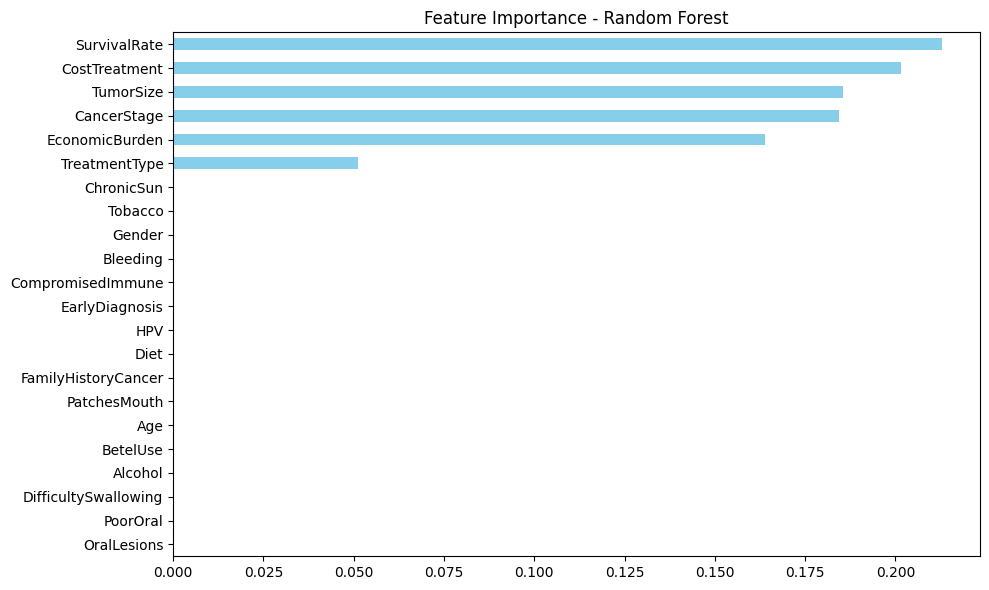

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=True).plot(kind='barh', figsize=(10, 6), color='skyblue')
plt.title("Feature Importance - Random Forest")
plt.tight_layout()
plt.show()


✅ 4. บันทึกโมเดล

In [63]:
import joblib

# Save model
joblib.dump(rf_model, 'oral_cancer_model.pkl')


['oral_cancer_model.pkl']

✅ 5. ประเมินด้วย Confusion Matrix + Precision, Recall, F1

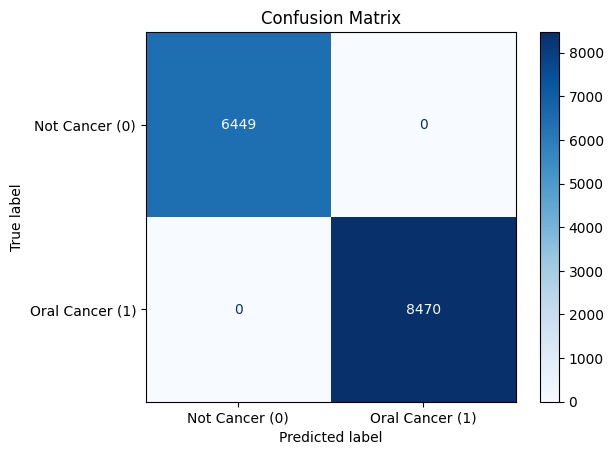

Confusion Matrix:
 [[6449    0]
 [   0 8470]]
ROC-AUC Score: 1.0
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00      6449
      Cancer       1.00      1.00      1.00      8470

    accuracy                           1.00     14919
   macro avg       1.00      1.00      1.00     14919
weighted avg       1.00      1.00      1.00     14919



In [64]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# พยากรณ์ผล
y_pred = rf_model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Cancer (0)', 'Oral Cancer (1)'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# เทรนโมเดล
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# ประเมินบน Test Set
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))
print(classification_report(y_test, y_pred, target_names=['Normal', 'Cancer']))


✅ 6. 5-Fold Cross-Validation พร้อมตารางสรุป

In [65]:
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd

# กำหนด metrics ที่ต้องการประเมิน
metrics = ['accuracy', 'precision', 'recall', 'f1']
cv_results = []

# ประเมินแต่ละ metric ด้วย cross-validation
for metric in metrics:
    scores = cross_val_score(rf_model, X, y, cv=5, scoring=metric)
    result_row = {
        'Metric': metric,
        'Mean': np.round(scores.mean(), 3),
        'STD': np.round(scores.std(), 3),
    }
    # เพิ่มค่าของแต่ละ fold
    for i, score in enumerate(scores):
        result_row[f'Fold{i+1}'] = np.round(score, 3)
    
    cv_results.append(result_row)

# สร้าง DataFrame สรุปผล
cv_summary = pd.DataFrame(cv_results)

print("\n📊 5-Fold Cross-Validation Summary:")
print(cv_summary)

# ✅ คำนวณค่าเฉลี่ยความแม่นยำจาก Fold1–Fold5
# accuracy_row = cv_summary[cv_summary['Metric'] == 'accuracy']
fold_cols = ['Fold1', 'Fold2', 'Fold3', 'Fold4', 'Fold5']
# mean_accuracy = accuracy_row[fold_cols].mean(axis=1).values[0]
# print(f"\n📌 ค่าเฉลี่ยความแม่นยำจาก 5-Fold (Fold1–Fold5): {mean_accuracy:.3f}")

# สรุปค่าเฉลี่ย Fold1–Fold5 ของทุกแถว
for metric in ['accuracy', 'precision', 'recall', 'f1']:
    row = cv_summary[cv_summary['Metric'] == metric]
    mean_score = row[fold_cols].mean(axis=1).values[0]
    print(f"{metric.capitalize()} (Mean from Fold1–5): {mean_score:.3f}")



📊 5-Fold Cross-Validation Summary:
      Metric  Mean  STD  Fold1  Fold2  Fold3  Fold4  Fold5
0   accuracy   1.0  0.0    1.0    1.0    1.0    1.0    1.0
1  precision   1.0  0.0    1.0    1.0    1.0    1.0    1.0
2     recall   1.0  0.0    1.0    1.0    1.0    1.0    1.0
3         f1   1.0  0.0    1.0    1.0    1.0    1.0    1.0
Accuracy (Mean from Fold1–5): 1.000
Precision (Mean from Fold1–5): 1.000
Recall (Mean from Fold1–5): 1.000
F1 (Mean from Fold1–5): 1.000


✅ สร้าง Learning Curve เพื่อตรวจสอบ Overfitting

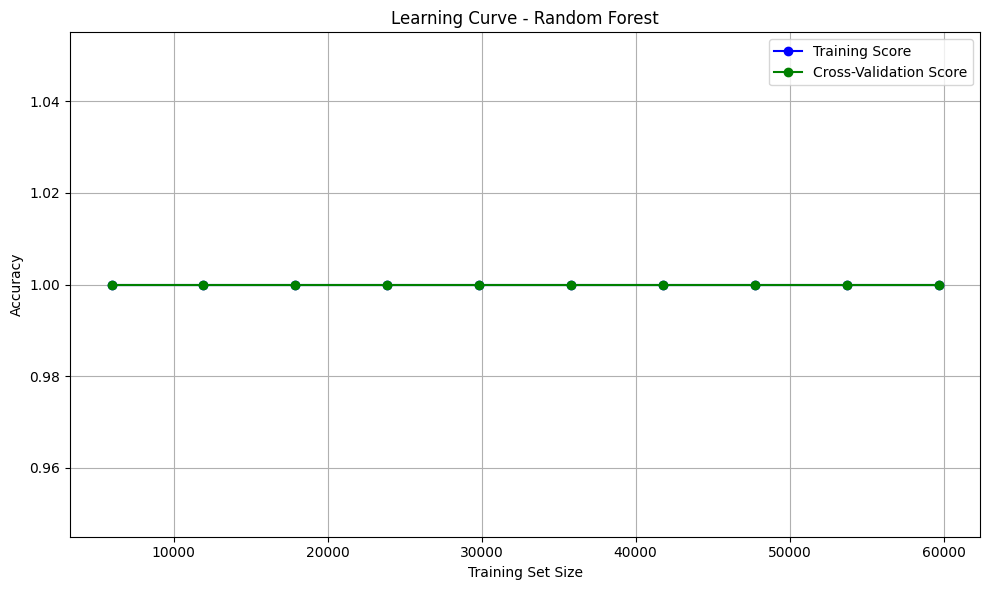

In [66]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# คำนวณค่า learning curve
train_sizes, train_scores, val_scores = learning_curve(
    model, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10),
    shuffle=True  # ใช้ shuffle แทนการใส่ random_state
)

# คำนวณค่าเฉลี่ยและส่วนเบี่ยงเบนมาตรฐาน
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# วาดกราฟ
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color="blue", label="Training Score")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="blue")
plt.plot(train_sizes, val_mean, 'o-', color="green", label="Cross-Validation Score")
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color="green")

# plt.plot(train_sizes, train_scores_mean, 'o--', color='blue', label='Training Score', alpha=0.7)

plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve - Random Forest")
plt.legend(loc="best")
plt.grid(True)
plt.tight_layout()
plt.show()


📌 โค้ดสำหรับตรวจสอบเพิ่มเติมการเกิด Overfitting (บน Test Set):

In [67]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# สมมติว่า X_test, y_test เป็นชุดทดสอบ
y_pred = model.predict(X_test)

# แสดงผล
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0
Confusion Matrix:
 [[6449    0]
 [   0 8470]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6449
           1       1.00      1.00      1.00      8470

    accuracy                           1.00     14919
   macro avg       1.00      1.00      1.00     14919
weighted avg       1.00      1.00      1.00     14919



✅ การประเมินโมเดลด้วย ROC-AUC และ PR Curve

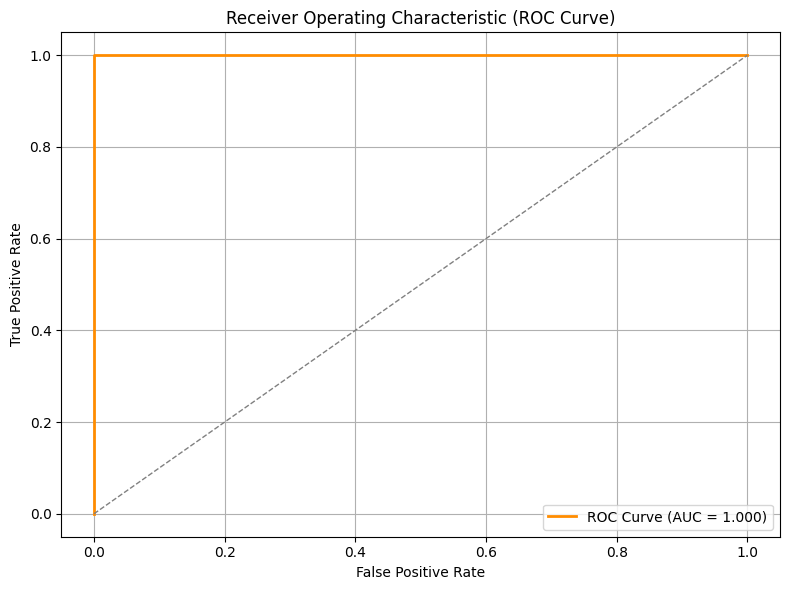

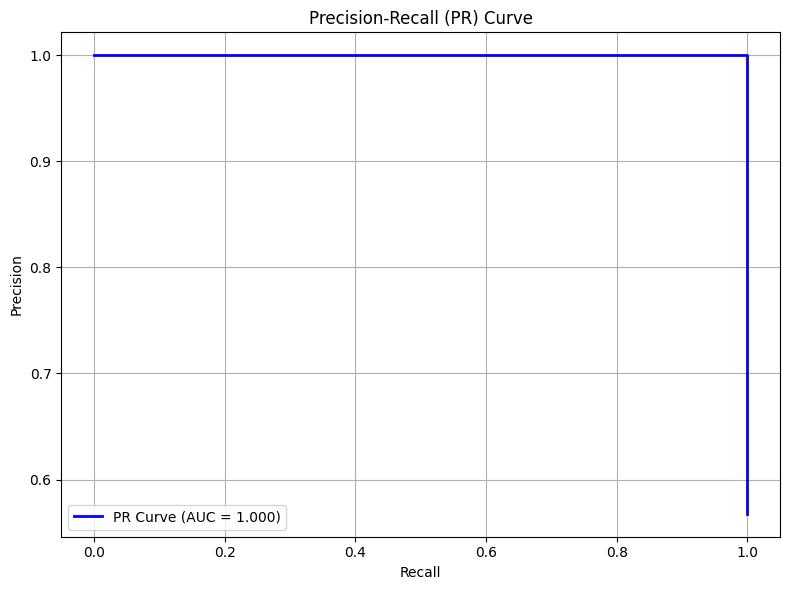


🎯 ROC-AUC Score: 1.000
🎯 PR-AUC (Average Precision): 1.000


In [68]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

# พยากรณ์ค่าความน่าจะเป็น (probability)
y_proba = rf_model.predict_proba(X_test)[:, 1]  # สำหรับคลาส 1 (เป็นมะเร็ง)

# ===============================
# ✅ 1. ROC Curve & ROC-AUC Score
# ===============================
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC Curve)')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# ===============================
# ✅ 2. Precision-Recall Curve
# ===============================
precision, recall, _ = precision_recall_curve(y_test, y_proba)
pr_auc = average_precision_score(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'PR Curve (AUC = {pr_auc:.3f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall (PR) Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.tight_layout()
plt.show()

# ===============================
# ✅ แสดงค่า AUC ทั้ง ROC และ PR
# ===============================
print(f"\n🎯 ROC-AUC Score: {roc_auc:.3f}")
print(f"🎯 PR-AUC (Average Precision): {pr_auc:.3f}")


✅ 7. แสดงไดอะแกรมของ Random Forest Tree (1 ต้น)

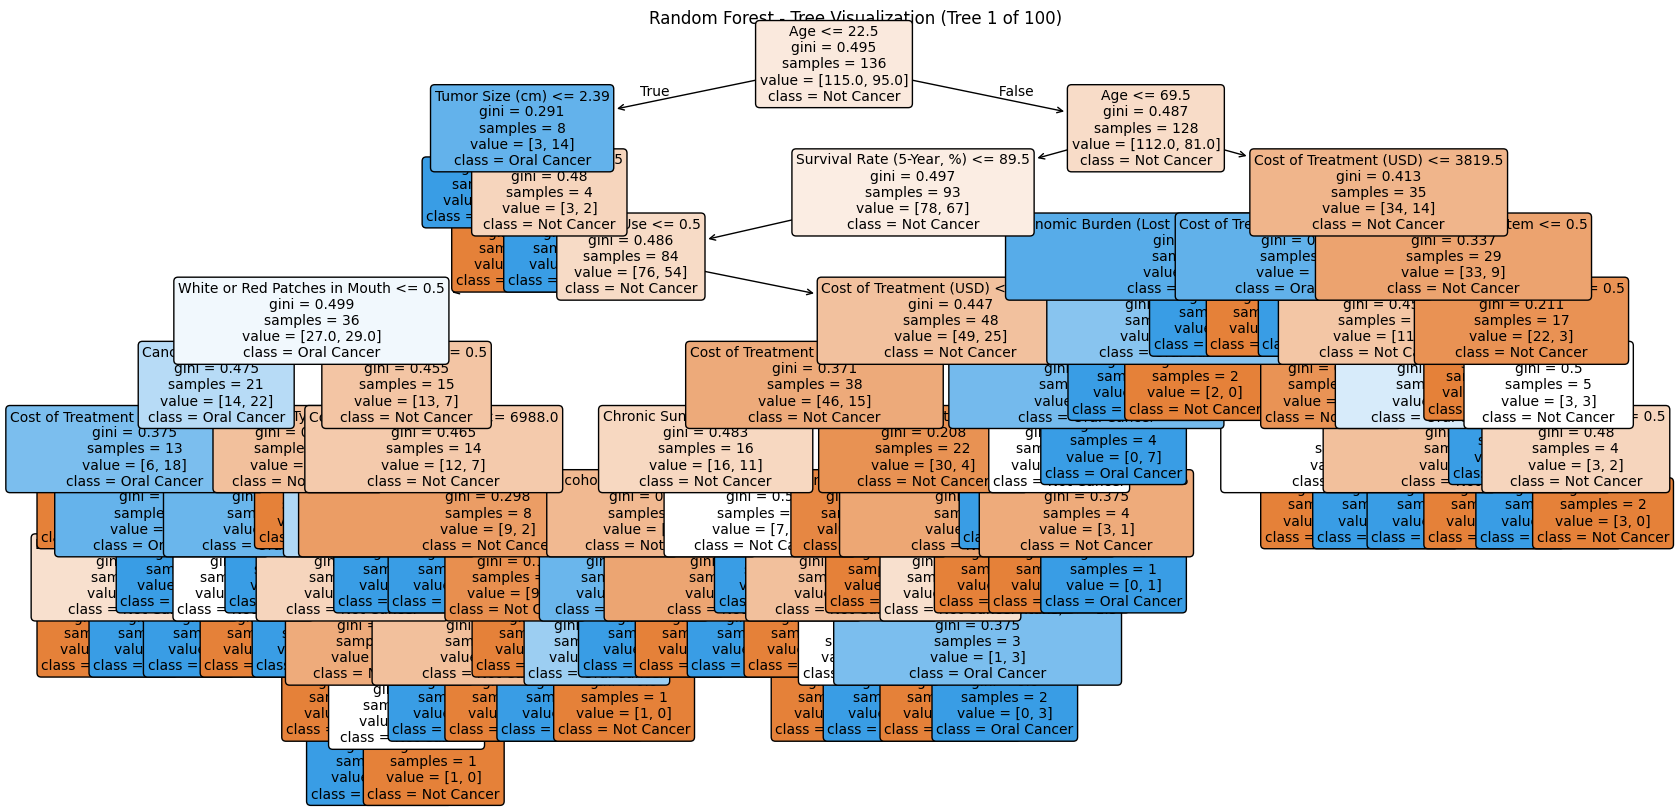

In [69]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# สร้าง feature names
feature_names = [
    'Country', 'Age', 'Gender', 'Tobacco Use', 'Alcohol Consumption',
    'HPV Infection', 'Betel Quid Use', 'Chronic Sun Exposure',
    'Poor Oral Hygiene', 'Diet (Fruits & Vegetables Intake)',
    'Family History of Cancer', 'Compromised Immune System', 'Oral Lesions',
    'Unexplained Bleeding', 'Difficulty Swallowing',
    'White or Red Patches in Mouth', 'Tumor Size (cm)', 'Cancer Stage',
    'Treatment Type', 'Survival Rate (5-Year, %)',
    'Cost of Treatment (USD)', 'Economic Burden (Lost Workdays per Year)',
    'Early Diagnosis'
]

# ตัวอย่างการจำลองข้อมูล (แทนการใช้ dataset จริง)
# สร้าง DataFrame จำลอง
np.random.seed(42)
n_samples = 300

X = pd.DataFrame({
    'Country': np.random.choice([0, 1], size=n_samples),  # สมมุติ 0=Low-income, 1=High-income
    'Age': np.random.randint(18, 85, size=n_samples),
    'Gender': np.random.choice([0, 1], size=n_samples),  # 0=Male, 1=Female
    'Tobacco Use': np.random.choice([0, 1], size=n_samples),
    'Alcohol Consumption': np.random.choice([0, 1], size=n_samples),
    'HPV Infection': np.random.choice([0, 1], size=n_samples),
    'Betel Quid Use': np.random.choice([0, 1], size=n_samples),
    'Chronic Sun Exposure': np.random.choice([0, 1], size=n_samples),
    'Poor Oral Hygiene': np.random.choice([0, 1], size=n_samples),
    'Diet (Fruits & Vegetables Intake)': np.random.randint(0, 5, size=n_samples),
    'Family History of Cancer': np.random.choice([0, 1], size=n_samples),
    'Compromised Immune System': np.random.choice([0, 1], size=n_samples),
    'Oral Lesions': np.random.choice([0, 1], size=n_samples),
    'Unexplained Bleeding': np.random.choice([0, 1], size=n_samples),
    'Difficulty Swallowing': np.random.choice([0, 1], size=n_samples),
    'White or Red Patches in Mouth': np.random.choice([0, 1], size=n_samples),
    'Tumor Size (cm)': np.round(np.random.uniform(0, 5, size=n_samples), 2),
    'Cancer Stage': np.random.randint(0, 4, size=n_samples),
    'Treatment Type': np.random.choice([0, 1, 2], size=n_samples),  # 0=Surgery, 1=Chemo, 2=Radio
    'Survival Rate (5-Year, %)': np.round(np.random.uniform(10, 95, size=n_samples), 1),
    'Cost of Treatment (USD)': np.random.randint(1000, 20000, size=n_samples),
    'Economic Burden (Lost Workdays per Year)': np.random.randint(0, 365, size=n_samples),
    'Early Diagnosis': np.random.choice([0, 1], size=n_samples)
})

# จำลอง target: 0 = ไม่เป็นมะเร็ง, 1 = เป็นมะเร็ง
y = np.random.choice([0, 1], size=n_samples, p=[0.6, 0.4])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# สร้างโมเดล Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# แสดง decision tree ตัวอย่างจาก forest (ต้นที่ 1)
plt.figure(figsize=(20, 10))
plot_tree(rf_model.estimators_[0],
          feature_names=feature_names,
          class_names=["Not Cancer", "Oral Cancer"],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Random Forest - Tree Visualization (Tree 1 of 100)")
plt.show()


แสดงกราฟไดอะแกรม random forest อีกวิธีหนึ่ง

In [70]:
df = pd.read_csv('oral_cancer.csv',sep=';')
df

,Age,Gender,Tobacco,Alcohol,HPV,BetelUse,ChronicSun,PoorOral,Diet,FamilyHistoryCancer,CompromisedImmune,OralLesions,Bleeding,DifficultySwallowing,PatchesMouth,TumorSize,CancerStage,TreatmentType,SurvivalRate,CostTreatment,EconomicBurden,EarlyDiagnosis,OralCancer
0,36,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0.000000,0,1,100.000000,0.00,0,0,0
1,64,0,1,1,1,0,1,1,2,0,0,0,1,0,0,1.782186,1,1,83.340103,77772.50,177,0,1
2,37,1,0,1,0,0,1,1,1,0,0,0,0,0,1,3.523895,2,3,63.222871,101164.50,130,1,1
3,55,0,1,1,0,1,0,1,1,0,0,1,0,0,0,0.000000,0,1,100.000000,0.00,0,1,0
4,68,0,0,0,0,0,0,1,2,0,0,0,0,0,0,2.834789,3,1,44.293199,45354.75,52,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84917,46,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0.000000,0,1,100.000000,0.00,0,1,0
84918,41,0,1,1,0,0,0,0,1,0,1,0,0,1,1,0.000000,0,1,100.000000,0.00,0,1,0
84919,72,0,1,1,0,1,0,1,2,1,0,0,0,0,0,4.777394,1,3,85.633426,81352.50,90,0,1
84920,67,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0.000000,0,1,100.000000,0.00,0,1,0


In [71]:
df.columns

Index(['Age', 'Gender', 'Tobacco', 'Alcohol', 'HPV', 'BetelUse', 'ChronicSun',
       'PoorOral', 'Diet', 'FamilyHistoryCancer', 'CompromisedImmune',
       'OralLesions', 'Bleeding', 'DifficultySwallowing', 'PatchesMouth',
       'TumorSize', 'CancerStage', 'TreatmentType', 'SurvivalRate',
       'CostTreatment', 'EconomicBurden', 'EarlyDiagnosis', 'OralCancer'],
      dtype='object')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8560
           1       1.00      1.00      1.00      8425

    accuracy                           1.00     16985
   macro avg       1.00      1.00      1.00     16985
weighted avg       1.00      1.00      1.00     16985



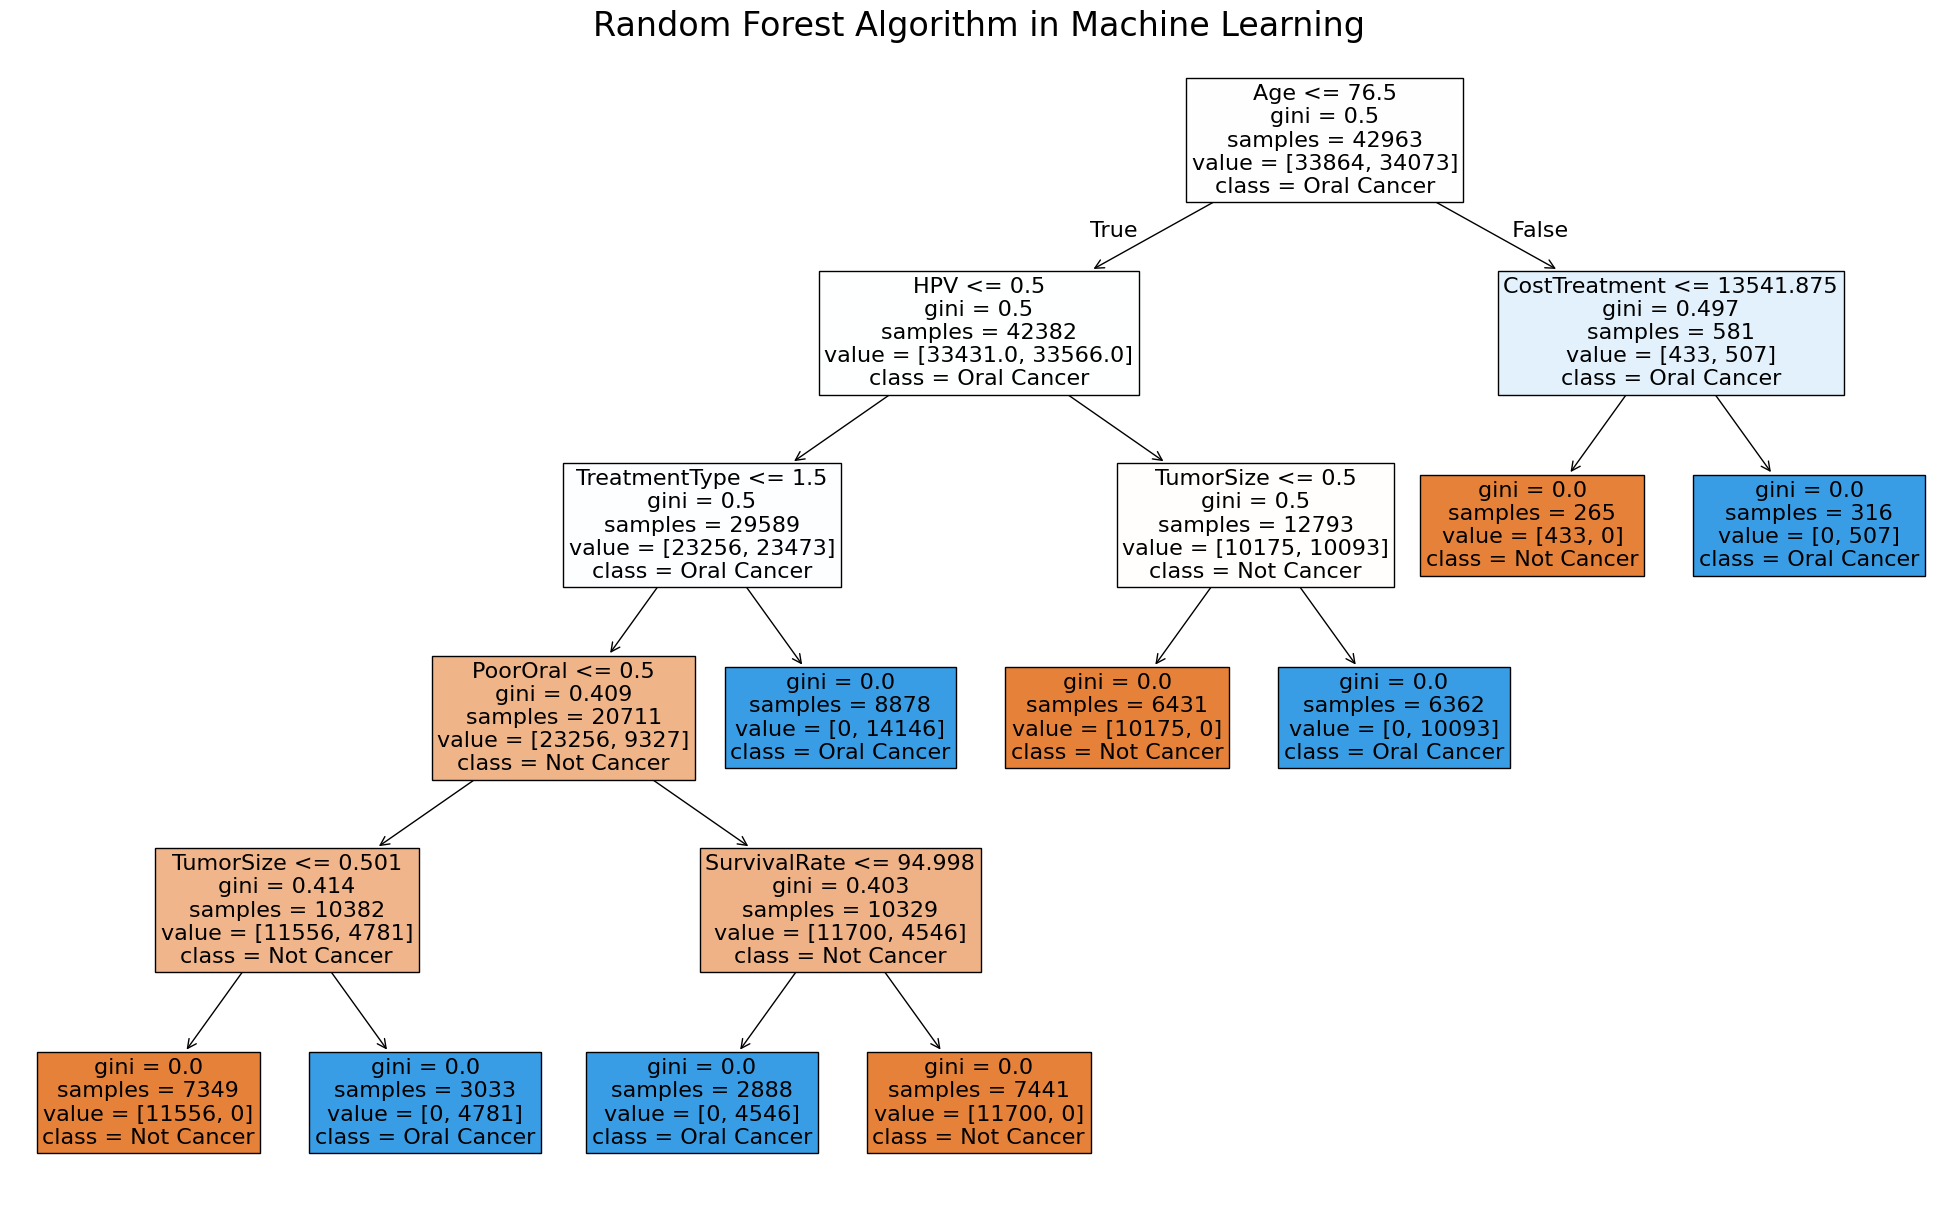

In [72]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import tree
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('oral_cancer.csv',sep=';')  # ตรวจสอบว่า dataset มีข้อมูลครบ

# Define features and target
feature_names = ['Age', 'Gender', 'Tobacco', 'Alcohol', 'HPV', 'BetelUse', 'ChronicSun',
       'PoorOral', 'Diet', 'FamilyHistoryCancer', 'CompromisedImmune',
       'OralLesions', 'Bleeding', 'DifficultySwallowing', 'PatchesMouth',
       'TumorSize', 'CancerStage', 'TreatmentType', 'SurvivalRate',
       'CostTreatment', 'EconomicBurden', 'EarlyDiagnosis']

target = 'OralCancer'

# Drop rows with missing values
df = df.dropna(subset=feature_names + [target])

# Define features and target
X = df[feature_names]
y = df[target]

# One-hot encoding
X = pd.get_dummies(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Visualize deeper tree (pick the deepest tree among estimators)
# Find the estimator with most depth
max_depth_tree = max(model.estimators_, key=lambda t: t.tree_.max_depth)


plt.figure(figsize=(25, 15))
tree.plot_tree(
    max_depth_tree,
    filled=True,
    feature_names=X.columns,
    class_names=["Not Cancer", "Oral Cancer"],
    # class_names=[str(cls) for cls in model.classes_],
    max_depth=5,  # เพิ่มหรือลดความลึกที่ต้องการแสดง
    fontsize=16   # เปลี่ยนขนาดตัวหนังสือเป็น 20
)
plt.title("Random Forest Algorithm in Machine Learning", fontsize=24)
# plt.subplots_adjust(top=0.6)
# plt.margins()
plt.show()
# แสดงกราฟ Decision Tree จาก Random Forest
# 🔍 อธิบาย:
# top=1.0 คือชิดขอบบนสุดของพื้นที่กราฟ
# top=0.85 คือเว้นระยะลงมาจากขอบบน 15% (เหมือน margin-top)
# ถ้าใส่ top=0.6 ก็คือเว้นเยอะมาก อาจทำให้ title หายไป





🔍 ตัวอย่างการแบ่งข้อมูลเพื่อการ train และ test ข้อมูลอีกวิธีหนึ่ง ดังนี้ 

X = data.iloc[:, :-1].values #เลือกทุกแถว เลือกทุกคอลัมน์ แต่ยกเว้นคอลัมน์สุดท้ายไม่เอา
y = data.iloc[:, -1].values #เลือกทุกแถว เลือกเฉพาะคอลัมน์สุดท้าย ส่วนคอลัมน์อื่นๆ ไม่เอา

In [73]:
data = pd.read_csv('oral_cancer.csv', sep=';')  #อ่านไฟล์ .csv ที่บันทึกไว้
data

,Age,Gender,Tobacco,Alcohol,HPV,BetelUse,ChronicSun,PoorOral,Diet,FamilyHistoryCancer,CompromisedImmune,OralLesions,Bleeding,DifficultySwallowing,PatchesMouth,TumorSize,CancerStage,TreatmentType,SurvivalRate,CostTreatment,EconomicBurden,EarlyDiagnosis,OralCancer
0,36,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0.000000,0,1,100.000000,0.00,0,0,0
1,64,0,1,1,1,0,1,1,2,0,0,0,1,0,0,1.782186,1,1,83.340103,77772.50,177,0,1
2,37,1,0,1,0,0,1,1,1,0,0,0,0,0,1,3.523895,2,3,63.222871,101164.50,130,1,1
3,55,0,1,1,0,1,0,1,1,0,0,1,0,0,0,0.000000,0,1,100.000000,0.00,0,1,0
4,68,0,0,0,0,0,0,1,2,0,0,0,0,0,0,2.834789,3,1,44.293199,45354.75,52,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84917,46,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0.000000,0,1,100.000000,0.00,0,1,0
84918,41,0,1,1,0,0,0,0,1,0,1,0,0,1,1,0.000000,0,1,100.000000,0.00,0,1,0
84919,72,0,1,1,0,1,0,1,2,1,0,0,0,0,0,4.777394,1,3,85.633426,81352.50,90,0,1
84920,67,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0.000000,0,1,100.000000,0.00,0,1,0


Training Accuracy: 1.0000
Test Accuracy: 1.0000


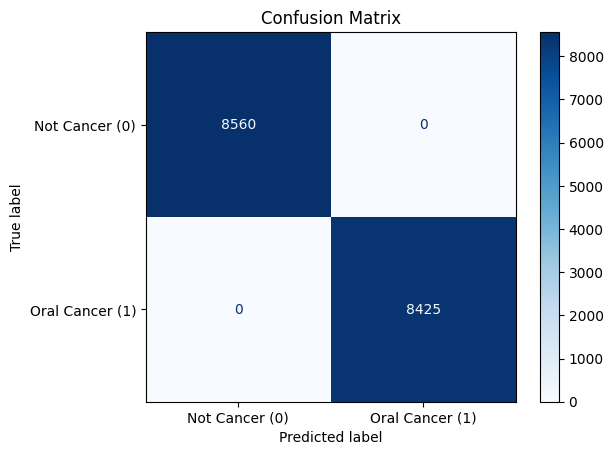

Confusion Matrix:
 [[8560    0]
 [   0 8425]]
ROC-AUC Score: 1.0
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00      8560
      Cancer       1.00      1.00      1.00      8425

    accuracy                           1.00     16985
   macro avg       1.00      1.00      1.00     16985
weighted avg       1.00      1.00      1.00     16985



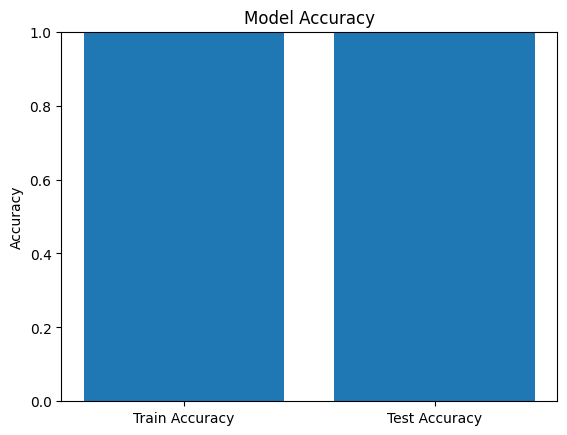

In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay,classification_report, roc_auc_score
import matplotlib.pyplot as plt
# from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, ConfusionMatrixDisplay
# from sklearn.ensemble import RandomForestClassifier


X = data.iloc[:, :-1].values 
y = data.iloc[:, -1].values

# แบ่ง train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# สร้างและ train Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# ทำนายผล
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# คำนวณ accuracy
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Cancer (0)', 'Oral Cancer (1)'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# เทรนโมเดล
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# ประเมินบน Test Set
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))
print(classification_report(y_test, y_pred, target_names=['Normal', 'Cancer']))

# วาดกราฟเปรียบเทียบ Accuracy
plt.figure()
plt.bar(['Train Accuracy', 'Test Accuracy'], [train_acc, test_acc])
plt.ylim(0, 1)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.show()


✅ โค้ดแสดง Confusion Matrix, ROC Curve, Precision-Recall Curve และ Feature Importance bar chart

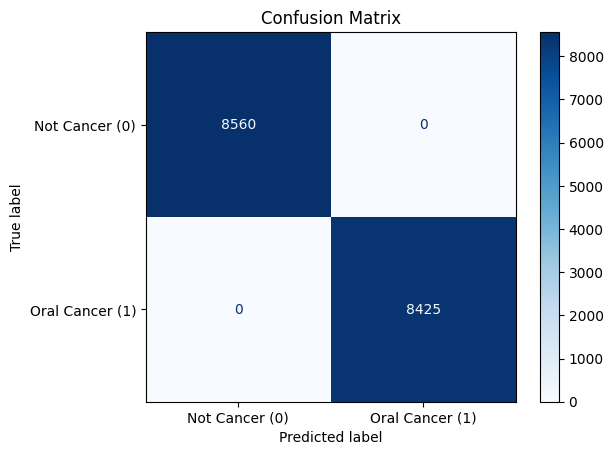

Confusion Matrix:
 [[8560    0]
 [   0 8425]]
ROC-AUC Score: 1.0
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00      8560
      Cancer       1.00      1.00      1.00      8425

    accuracy                           1.00     16985
   macro avg       1.00      1.00      1.00     16985
weighted avg       1.00      1.00      1.00     16985



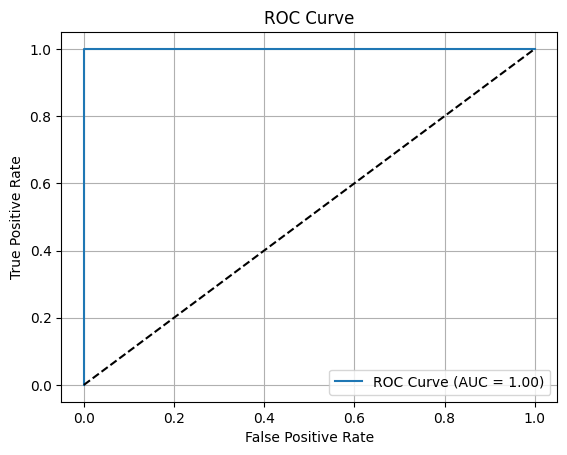

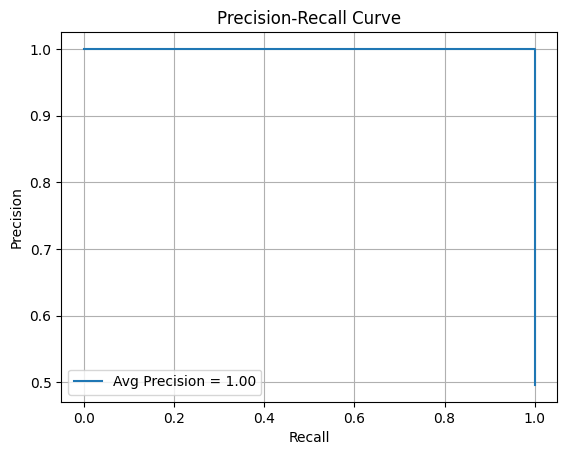

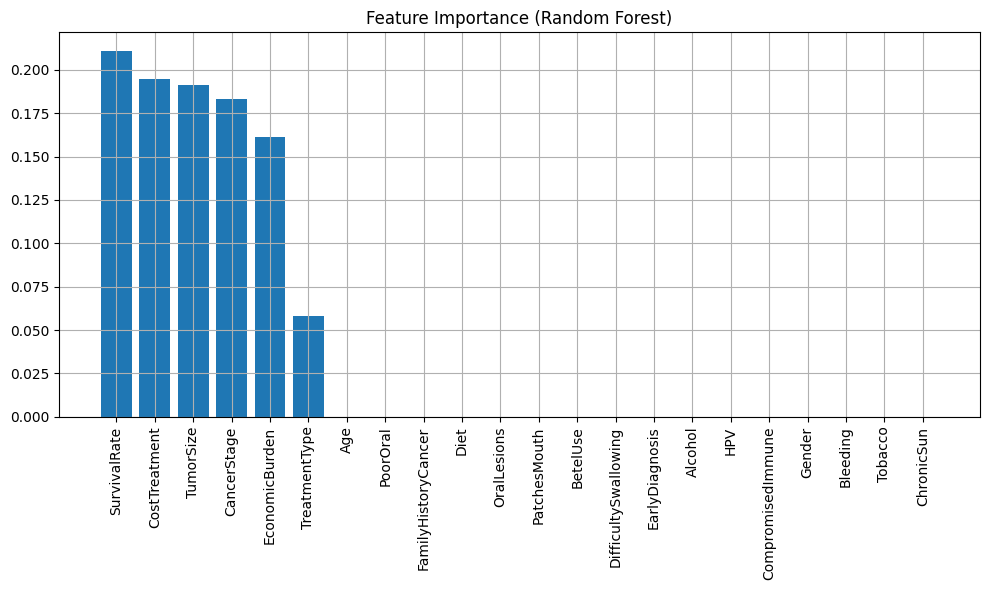

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, auc,classification_report, roc_auc_score,
    precision_recall_curve, average_precision_score
)
# from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, ConfusionMatrixDisplay
# from sklearn.ensemble import RandomForestClassifier

# ✅ 1. Load dataset
data = pd.read_csv('oral_cancer.csv', sep=';')

# ✅ 2. Define features and target
X = data.drop(columns=['OralCancer'])
y = data['OralCancer']

feature_names = X.columns.values
class_names = ['No Cancer', 'Cancer']  # หรือเปลี่ยนให้ตรงกับข้อมูลจริง

# ✅ 3. Convert to array-based dataset
dataset = {
    'data': X.to_numpy(),
    'target': y.to_numpy(),
    'feature_names': feature_names,
    'class_names': class_names
}

# ✅ 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    dataset['data'], dataset['target'], test_size=0.2, random_state=42
)

# ✅ 5. Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# ✅ 6. Predict
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # ความน่าจะเป็นสำหรับ class 1

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Cancer (0)', 'Oral Cancer (1)'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# เทรนโมเดล
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# ประเมินบน Test Set
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))
print(classification_report(y_test, y_pred, target_names=['Normal', 'Cancer']))


# ✅ 8. ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

# ✅ 9. Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_proba)
avg_precision = average_precision_score(y_test, y_proba)

plt.figure()
plt.plot(recall, precision, label=f"Avg Precision = {avg_precision:.2f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid(True)
plt.show()

# ✅ 10. Feature Importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
plt.title("Feature Importance (Random Forest)")
plt.tight_layout()
plt.grid(True)
plt.show()
